In [1]:
# demonstrate the types of features created
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures
# define the dataset
data = asarray([[2,3],[2,3],[2,3]])
print(data)
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=2)
data = trans.fit_transform(data)
print(data)

[[2 3]
 [2 3]
 [2 3]]
[[1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]]


In [2]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


In [3]:
# visualize a polynomial features transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures
# load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=3)
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.shape)

(208, 39711)


In [4]:
# evaluate knn on the sonar dataset with polynomial features transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = PolynomialFeatures(degree=3)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.800 (0.077)


Degree: 1, Features: 61
Degree: 2, Features: 1891
Degree: 3, Features: 39711
Degree: 4, Features: 635376
Degree: 5, Features: 8259888


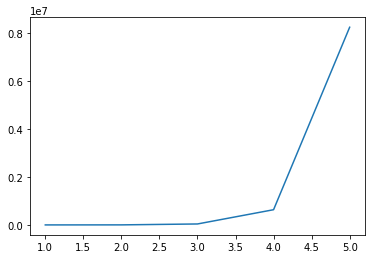

In [6]:
# compare the effect of the degree on the number of created features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	# load dataset
	url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
	dataset = read_csv(url, header=None)
	data = dataset.values
	# separate into input and output columns
	X, y = data[:, :-1], data[:, -1]
	# ensure inputs are floats and output is an integer label
	X = X.astype('float32')
	y = LabelEncoder().fit_transform(y.astype('str'))
	return X, y
 
# define dataset
X, y = get_dataset()
# calculate change in number of features
num_features = list()
degress = [i for i in range(1, 6)]
for d in degress:
	# create transform
	trans = PolynomialFeatures(degree=d)
	# fit and transform
	data = trans.fit_transform(X)
	# record number of features
	num_features.append(data.shape[1])
	# summarize
	print('Degree: %d, Features: %d' % (d, data.shape[1]))
# plot degree vs number of features
pyplot.plot(degress, num_features)
pyplot.show()

>1 0.797 (0.073)
>2 0.793 (0.085)
>3 0.800 (0.077)
>4 0.795 (0.079)


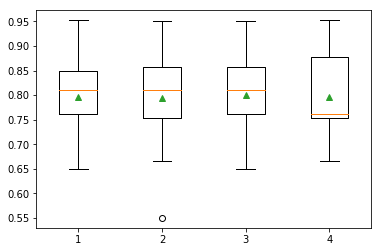

In [7]:
# explore the effect of degree on accuracy for the polynomial features transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	# load dataset
	url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
	dataset = read_csv(url, header=None)
	data = dataset.values
	# separate into input and output columns
	X, y = data[:, :-1], data[:, -1]
	# ensure inputs are floats and output is an integer label
	X = X.astype('float32')
	y = LabelEncoder().fit_transform(y.astype('str'))
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for d in range(1,5):
		# define the pipeline
		trans = PolynomialFeatures(degree=d)
		model = KNeighborsClassifier()
		models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()